# Student Performance Dataset - Diving into Learning Analytics

This is a notebook for the Final Course Project with the topic __Supervised Learning: Regression__.

In this notebook the open dataset _Student Performance Data Set_ from the _UCI Machine Learning Repository_ was used: (https://archive.ics.uci.edu/ml/datasets/student%2Bperformance)

__Reference__: P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Following sections will be answered with code examples:
1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
2. Brief description of the data set you chose and a summary of its attributes.
3. Summary of data exploration and actions taken for data cleaning and feature engineering.
4. Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
5. A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
6. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

## 1. Main objective of the analysis

The main objective of this analysis will lay on predicting the student performance (final grade) based on various attributes. The attributes will be evaluated on importancy of impact for the performance. I will use Linear Regression, Lasso, Ridge, and ElasticNet. I will do some exploratory data analysis, feature engineering, so that all values are represented e.g. in numbers. For each model I then will use accordingly a standard scaling and polynominal features. In the end I will calculate the r2-score for the performance of each model. 

## 2. Brief desription of the data set and a summary of its attributes

The _Student Performance Dataset_ includes data from achievements of secondary education students participating in courses of two different schools in Portugal. There are data from math courses and from Portuguese courses. For this assigment both datasets (maths and Portuguese) will be used. Using only one of the courses would lead to to little datasets.

### Why am I using this data?
I am in education for Learning Analytics

The structure of the data, which were provided as .csv from the _UCI Machine Learning Repository_ are as follows:

In the documentation of the dataset the dataset is described as follows:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. __school__ - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. __sex__ - student's sex (binary: "F" - female or "M" - male)
3. __age__ - student's age (numeric: from 15 to 22)
4. __address__ - student's home address type (binary: "U" - urban or "R" - rural)
5. __famsize__ - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. __Pstatus__ - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. __Medu__ - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. __Fedu__ - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. __Mjob__ - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. __Fjob__ - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. __reason__ - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. __guardian__ - student's guardian (nominal: "mother", "father" or "other")
13. __traveltime__ - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. __studytime__ - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. __failures__ - number of past class failures (numeric: n if 1<=n<3, else 4)
16. __schoolsup__ - extra educational support (binary: yes or no)
17. __famsup__ - family educational support (binary: yes or no)
18. __paid__ - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. __activities__ - extra-curricular activities (binary: yes or no)
20. __nursery__ - attended nursery school (binary: yes or no)
21. __higher__ - wants to take higher education (binary: yes or no)
22. __internet__ - Internet access at home (binary: yes or no)
23. __romantic__ - with a romantic relationship (binary: yes or no)
24. __famrel__ - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. __freetime__ - free time after school (numeric: from 1 - very low to 5 - very high)
26. __goout__ - going out with friends (numeric: from 1 - very low to 5 - very high)
27. __Dalc__ workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. __Walc__ - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. __health__ - current health status (numeric: from 1 - very bad to 5 - very good)
30. __absences__ - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject Math:
31. __G1__ - first period grade (numeric: from 0 to 20)
31. __G2__ - second period grade (numeric: from 0 to 20)
32. __G3__ final grade (numeric: from 0 to 20, output target)

## Keeping place for all packages needed in the notebook

In [1]:
# importing relevant packages for the notebook
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

## 3. Data Exploration, Data Cleaning and Feature Engineering

### Importing and concatenating of data

In [2]:
#importing data
data_math = pd.read_csv('student-mat.csv', sep='\;', engine='python')
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"""GP""","""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,"""GP""","""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,"""GP""","""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,"""GP""","""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,"""GP""","""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


In [3]:
data_por = pd.read_csv('student-por.csv', sep='\;', engine='python')
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"""GP""","""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,4,"""0""","""11""",11
1,"""GP""","""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,2,"""9""","""11""",11
2,"""GP""","""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,6,"""12""","""13""",12
3,"""GP""","""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,0,"""14""","""14""",14
4,"""GP""","""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,0,"""11""","""13""",13


In [4]:
#concatenating data_math and data_por
data = pd.concat([data_math, data_por], ignore_index=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"""GP""","""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,"""GP""","""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,"""GP""","""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,"""GP""","""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,"""GP""","""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,"""MS""","""F""",19,"""R""","""GT3""","""T""",2,3,"""services""","""other""",...,5,4,2,1,2,5,4,"""10""","""11""",10
1040,"""MS""","""F""",18,"""U""","""LE3""","""T""",3,1,"""teacher""","""services""",...,4,3,4,1,1,1,4,"""15""","""15""",16
1041,"""MS""","""F""",18,"""U""","""GT3""","""T""",1,1,"""other""","""other""",...,1,1,1,1,1,5,6,"""11""","""12""",9
1042,"""MS""","""M""",17,"""U""","""LE3""","""T""",3,1,"""services""","""services""",...,2,4,5,3,4,2,6,"""10""","""10""",10


### Exploratory data analysis

In [5]:
students = data.groupby(['sex'])['sex'].count()
students

sex
"F"    591
"M"    453
Name: sex, dtype: int64

There are more female students than male students (female = 591, male 453). Let's look who performed better in the final grade.

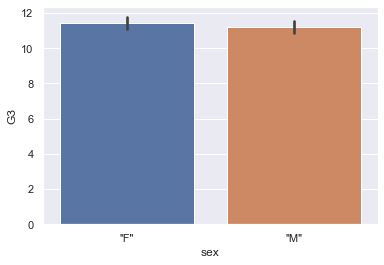

In [6]:
sns.barplot(x='sex',y='G3',data=data);

Females seem to be a bit more better performing in the final grade :-). Let's look in detail at the score of the final grade.

In [7]:
groups_grades_means = data.groupby(['sex'])['G3'].mean()
groups_grades_means

sex
"F"    11.448393
"M"    11.203091
Name: G3, dtype: float64

Female students achieved in average a bit higher scores for the end grade (female 11.4, male 11,2).

### Data Cleaning

I will have a look if there a missing values, which need to be handled before analyses

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

There are no missing values, but from 32 possible predicting feature categories 19 are from datatype "object", which need to be transformed in the step of Feature Engineering

### Feature Engineering

Colums G1 and G2 (object) transform into int so that they can serve as features.

In [9]:
cols_to_clean = ['G1', 'G2']

data[cols_to_clean] = data[cols_to_clean].replace({'"':''}, regex=True).astype('int64')

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"""GP""","""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,5,6,6
1,"""GP""","""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,5,5,6
2,"""GP""","""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,7,8,10
3,"""GP""","""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,15,14,15
4,"""GP""","""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,"""MS""","""F""",19,"""R""","""GT3""","""T""",2,3,"""services""","""other""",...,5,4,2,1,2,5,4,10,11,10
1040,"""MS""","""F""",18,"""U""","""LE3""","""T""",3,1,"""teacher""","""services""",...,4,3,4,1,1,1,4,15,15,16
1041,"""MS""","""F""",18,"""U""","""GT3""","""T""",1,1,"""other""","""other""",...,1,1,1,1,1,5,6,11,12,9
1042,"""MS""","""M""",17,"""U""","""LE3""","""T""",3,1,"""services""","""services""",...,2,4,5,3,4,2,6,10,10,10


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Transform all others columns with datatype object with one-hot-encoding.

In [11]:
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
data_ohc = pd.get_dummies(data, columns = one_hot_encode_cols, drop_first=True)
data_ohc

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,"guardian_""mother""","guardian_""other""","schoolsup_""yes""","famsup_""yes""","paid_""yes""","activities_""yes""","nursery_""yes""","higher_""yes""","internet_""yes""","romantic_""yes"""
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,0,1,0,1,1,0
1040,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,0,1,1,1,0
1041,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
1042,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0


Now the dataframe has still 1044 observations but 41 feature categories can now serve as features - before 32. All values are numeric.

## 4. Linear Regression Modeling

### Preparing of Features and Target

In [12]:
X = data_ohc.drop('G3', axis=1)
y = data_ohc.G3

### Implementation of Cross-Validation

In [13]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

### Manual coded Cross-Validation and Linear regression Model

In [14]:
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.8120890494471342, 0.834940933163443, 0.8226425587380314]

With 0.83 quite good results. Go on, but at first some visualization of the results!

### Visualization of the results of Linear Regression

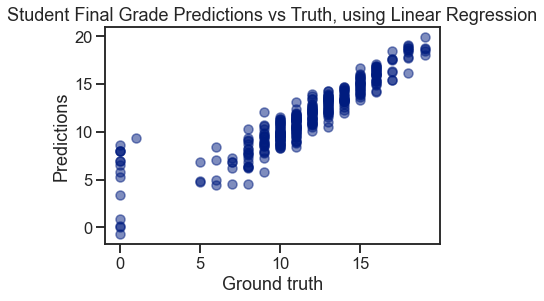

In [15]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Student Final Grade Predictions vs Truth, using Linear Regression');

As can be seen prdicitions of the final grade lay in a linear Fashion with some variance around the Ground truth, the real final grade. The variance of predictions when the ground truth are zero points for the final grade, shows well the accuracy of the model, which lays at 83%. So with 17% the model may predict wrong final garde points.

### Have a look at the feature importances

In [16]:
coef_dict = {}
for coef, feat in zip(lr.coef_,X.columns):
    coef_dict[feat] = coef

sorted_values = sorted(coef_dict.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in coef_dict.keys():
        if coef_dict[k] == i:
            sorted_dict[k] = coef_dict[k]
            break

sorted_dict

{'Fjob_"teacher"': -0.5458979852178673,
 'Fjob_"services"': -0.4924765526554024,
 'paid_"yes"': -0.3848438712641582,
 'Fjob_"other"': -0.29945209003576395,
 'Pstatus_"T"': -0.25861865419079,
 'reason_"home"': -0.24112711990915353,
 'reason_"other"': -0.23170376809090135,
 'failures': -0.20240026229127778,
 'Fjob_"health"': -0.19218342666718133,
 'Mjob_"other"': -0.1717436309036733,
 'romantic_"yes"': -0.15143319815656603,
 'Mjob_"teacher"': -0.14282314577290386,
 'studytime': -0.10325017914396074,
 'reason_"reputation"': -0.09570276377198005,
 'freetime': -0.06967860739260265,
 'nursery_"yes"': -0.061036162348216634,
 'famsize_"LE3"': -0.055156958587176966,
 'sex_"M"': -0.053779472914736316,
 'age': -0.047628292991104985,
 'Mjob_"services"': -0.045736055034988385,
 'Fedu': -0.032538672499784746,
 'goout': -0.0276391059932967,
 'Medu': -0.01731597638821875,
 'activities_"yes"': -0.013849593523883492,
 'Dalc': -0.009589818077630194,
 'absences': 0.025219330112878097,
 'health': 0.0254275

As can be seen the for most important features are: the job of the father (e.g. teacher) and the second period grade.


### Adding Polynominal Features to the Linear Regression Model using the Pipeline

In [17]:
pf = PolynomialFeatures(degree=2)

scores_pf_lr = []
estimator = Pipeline([
        ("make_higher_degree", pf),
        ("linear_regression", lr)])

predictions = cross_val_predict(estimator, X, y, cv = kf)
    
score = r2_score(y, predictions)
    
scores_pf_lr.append(score)

scores_pf_lr

[-35.99067904746558]

Well, as already guessed polynominal features aren't the hit for this use case due to the well performing basic Linear Regression Model

### Doing regularization with Lasso Regression

In [18]:
scores_las = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores_las.append(score)

scores_las

[0.8301937438443447,
 0.8299023838283823,
 0.8297001623824343,
 0.8294559327963436,
 0.8293877945047553,
 0.8292648748605665,
 0.8290496292595055,
 0.8286801761229894,
 0.8280554292891631,
 0.827049254707439,
 0.8257211784858899,
 0.8236019408481491,
 0.8199541264097927,
 0.8142691984761321,
 0.8060022519063699,
 0.7930336251769183,
 0.7720759698688766,
 0.7381734801793886,
 0.6832865941453856,
 0.5943704918617225]

Quite equal to basic linear regression, a bit lower values of rounded 0.83.

### Doing regularization with Ridge Regression

In [19]:
alphas = np.geomspace(4, 20, 20)
scores_ridg=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores_ridg.append(score)

scores_ridg

[0.8260972041585964,
 0.8261538566632718,
 0.8262135326540406,
 0.8262762857745816,
 0.8263421568763585,
 0.8264111720985625,
 0.8264833408436253,
 0.8265586536702192,
 0.8266370801332454,
 0.8267185666077066,
 0.8268030341399317,
 0.8268903763747238,
 0.8269804576100005,
 0.8270731110309272,
 0.8271681371730555,
 0.8272653026584942,
 0.8273643392408033,
 0.827464943183475,
 0.8275667749841195,
 0.8276694594424903]

Quite similar as the other two models, with 0.82 a bit lower.

### Calculating the errors of the predictions for each model and visualization

Defining a function for the mean squared error of a model

In [20]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

Calculating the mean squared error for the simple Linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

1.577617922103252


Calculating the mean squared error for the Ridge regression model

In [22]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

80.0 1.5569353709640532


Calculating the mean sqaured error for the Lasse regression Model

In [23]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)

0.0005 1.575723007069731


In [24]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,1.577618
Ridge,1.556935
Lasso,1.575723


All mean squared errors are quite similar.

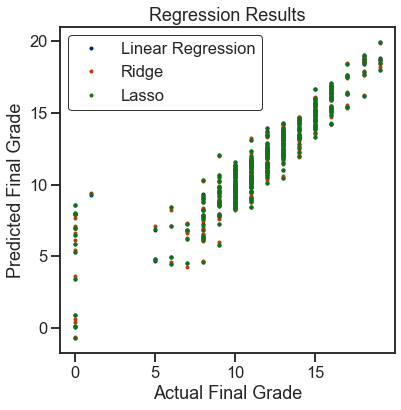

In [25]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Linear Regression', 'Ridge', 'Lasso']

models = [linearRegression, ridgeCV, lassoCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Final Grade', 
       ylabel='Predicted Final Grade', 
       title='Regression Results');

__What does this finally mean?__ All models with or without regularization work quite similar with similiar mean squared error of predictions. Due to the simplicity of models I would reccomend finally a normal Linear regression model without regularization based on the highest accuracy score of 83% and similar mean squared errors in comparision to the regularized models.

### Summarizing...

I performed inital exploratory data analysis, feature engineering and performed with cross-validation linear regression, with later on adding polynominal features and two methods of regularization (Lasso and Ridge). Mean squared errors were calculated.
I prefer the basic linear regression model. Herein, the feature importance is quite balanced, but most important is the job of the father, especially when the father is a teacher and the second period grade - the grade before the final grade.

### Notebook created for IBM Professional Certificate at coursera by Verena Dornauer, January/February 2021